# DSCI Group Project Report: Predicting Heart Disease based on Age, Resting Blood Pressure, and Cholesterol Levels #

#### Clare Sheinin, Emese Soti, Saman Atiq, Sarah Teng ####

## **Introduction** 

Heart disease is a term that refers to a variety of conditions that affect the heart. Common conditions include coronary artery disease and exercise-induced angina. Several factors are associated with heart disease, including increasing age, high blood pressure, and high levels of sodium, cholesterol, sugar, and fats (Dalen et al., 2014). In the US, heart disease is the greatest cause of death for both men and women, claiming one life every 33 seconds. In 2021, 695,000 people died from heart disease (CDC, 2023). Considering these stats, we decided to base our project on a knn classification algorithm that will help us predict the presence of heart disease. 

**"Can we predict if a patient has heart disease based on their age, resting blood pressure, and cholesterol levels?"** 

We will assess the Cleveland Heart Disease dataset to help us answer this question. The column-names are as follows:
1. **age** - Patient's age
2. **sex** - Patient's sex
3. **cp** - Chest pain type
4. **trestbps** - Resting blood pressure
5. **chol** - Cholesterol level (mg/dl)
6. **fbs**- True if patient's fasting blood sugar > 120 mg/dl
7. **restecg** - Resting electrocardiographic 
8. **thalach** - Maximum heart rate
9. **exang** - Exercise-induced angina (yes or no)
10. **oldpeak** - ST exercise-induced Depression
11. **slope** - Slope of the peak exercise ST segment 
12. **ca** - Number of major vessels (0-3) 
13. **thal** - Presence of thalassemia 
14. **num** - Diagnosis of heart disease (val= 0 indicates absence of heart disease, val= (1, 2, 3, 4) shows presence of heart disease

## **Methods**

- ### Data Acquisition and Loading:
  We began by importing necessary libraries and directly loading the processed.cleveland.data dataset from an online repository. 
- ### Data Wrangling and Cleaning:
  We assigned descriptive column names and treated missing values marked with "?" by converting them to NA (Not Available). We then split the dataset into training   and testing sets in a 75:25 ratio, strictly utilizing the training set for developing our model.
- ### Data Summarization:
  Summarized the training data, focusing on variables related to heart disease risk factors—specifically age, resting blood pressure, and cholesterol levels—to     formulate hypotheses for our classifier. 
- ### Exploratory Data Visualization:
  We used scatter plots to reveal the relationship between these variables and heart disease. These plots were color-coded based on the diagnosis (presence or      absence of heart disease) to identify any visible trends or patterns. We then decided to use age and cholesterol since it gave a more positive trend.
- ### Model Training and Tuning:
  - Established a reproducible environment by setting a seed using set.seed(1) to ensure consistency in results.
  - Scaled and centered all predictors, specifically age and cholesterol, using the step_scale and step_center functions from the recipes package.
  - Specified a KNN model using the nearest_neighbor function with neighbors = tune(), enabling the selection of the best k-value
  - Prepared for cross-validation by defining a v-fold object with 10 folds using vfold_cv
  - Combined the recipe and the model into a workflow with workflow() 
  - Performed a grid search over k-values from 1 to 100 using tune_grid on the workflow, supplying the grid of values gridvals and evaluated using the resampled        training data from the v-fold object.
  - Identified the optimal k-value by analyzing the accuracy of the model across different k-values
- ### Analytical Process:
    Determined the best k-value for the KNN classifier via a grid search method, optimizing for accuracy and preventing overfitting or underfitting. Used the     chosen k-value to finalize our model.

## **Results:**

- ### Visualizations:
Our scatter plots demonstrated a distinct trend correlating higher cholesterol levels and age with the presence of heart disease.
- ### Model Performance:
The confusion matrix, produced after applying the model to the test set, revealed our classifier's accuracy to be 63%, indicating its practical utility.



### Preliminary exploratory data analysis:

In [1]:
# Loading tidyverse libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Reading the Dataset

Our dataset is in the form as a url, so we need to read in our heart disease data using `read_delim`. 

In [2]:
# Reading in the Data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland <- read_delim(url, delim = ",", col_names = FALSE)                          
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1   63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2   67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3   67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
⋮   ⋮  ⋮  ⋮  ⋮   ⋮   ⋮  ⋮  ⋮   ⋮  ⋮   ⋮   ⋮   ⋮   ⋮  
301 57 1  4  130 131 0  0  115 1  1.2 2   1.0 7.0 3  
302 57 0  2  130 236 0  2  174 0  0.0 2   1.0 3.0 1  
303 38 1  3  138 175 0  0  173 0  0.0 1   ?   3.0 0

Figure 1

#### Cleaning and Tidying the Dataset

Now that we have read in our data, we need to `NA` to any `?` values. Additionally, we use the `c()` function to name our columns, as they were unnamed our dataset were unnamed. 

In [3]:
# assigned NA to "?" values 
cleveland[ cleveland == "?" ] <- NA
# The data had no column names, so here we added them
columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland <- read_csv(url, col_names = columns)
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2   67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3   67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮   ⋮   
301 57  1   4  130      131  0   0       115     1     1.2     2     1.0 7.0 
302 57  0   2  130      236  0   2       174     0     0.0     2     1.0 3.0 
303 38  1   3  138      175  0   0       173     0     0.0     1     ?   3.0 
    num
1   0  
2   2  
3   1  
⋮   ⋮  
301 3  
302 1  
303 0

Figure 2

Next, we alter the variables of interest to change them into either intergers or factors. This is so that they would be easier to work with — especially when producing plots. We changed the numbers in the `num` column to `Yes` or `No`, based on whether the number indicated heart disease. 

In [4]:
# Here we changed our variables of interest into factors and integers to make them easier to work with/plot
# The 'num' column becomes 'yes' or 'no' based on whether the number indicates heart disease 
# (val= 0 indicates absence of heart disease, val= (1, 2, 3, 4) shows presence of heart disease
set.seed(1)
cleveland_tidy <- cleveland |>
  mutate(
    num = as.factor(as.integer(num)),
    num = recode(num, "0" = "No", "1" = "Yes", "2" = "Yes", "3" = "Yes", "4" = "Yes"),
    restecg = as.integer(restecg),
    restecg = recode(restecg, "0" = "0", "1" = "1", "2" = "1"),
    exang = as.integer(exang),
    age = as.integer(age),
    restecg = as.integer(restecg),
    trestbps = as.integer(trestbps),
    chol = as.integer(chol)
      ) |>
    filter(ca != "?")
cleveland_tidy

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1   63  1   1  145      233  1   1       150     0     2.3     3     0.0 6.0 
2   67  1   4  160      286  0   1       108     1     1.5     2     3.0 3.0 
3   67  1   4  120      229  0   1       129     1     2.6     2     2.0 7.0 
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮   ⋮   
297 68  1   4  144      193  1   0       141     0     3.4     2     2.0 7.0 
298 57  1   4  130      131  0   0       115     1     1.2     2     1.0 7.0 
299 57  0   2  130      236  0   1       174     0     0.0     2     1.0 3.0 
    num
1   No 
2   Yes
3   Yes
⋮   ⋮  
297 Yes
298 Yes
299 Yes

Figure 3

#### Splitting the data into training and testing sets

The cleaned and tidied data must be split into training and testing sets before building the initial model. This is done by using `initial_split` to divide the data, making it 75% training set and 25% testing set. 

In [5]:
# Splitting the data into training and testing sets
cleveland_split <- initial_split(cleveland_tidy, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

#### Summarizing the data

Before we can build the initial model, we group the training data by their diagnosis using the `group_by` function and `summarize` to find the number of observations and averages of our predictors in each category of the diagnosis. 

In [6]:
# Summarizing the data
cleveland_table <- cleveland_train |>
    group_by(num) |>
    summarize(n_obs = n(), age_avg = mean(age), restecg_avg = mean(restecg), 
              exang_avg = mean(exang), trestbps_avg = mean(trestbps), chol_avg = mean(chol))
cleveland_table

num n_obs age_avg  restecg_avg exang_avg trestbps_avg chol_avg
1 No  120   52.64167 0.4250000   0.1333333 129.9583     244.1333
2 Yes 103   56.35922 0.5825243   0.5145631 134.6893     247.7282

Figure 4

- We can see from this table that the average age is higher for those diagnosed with heart disease
- On average, more patients with heart disease had abnormal ECG and exercised-induced angina values (1 = abnormal)
- On average, heart disease patients had a higher resting blood pressure and higher cholesterol levels

#### Comparing Variables

Here we use `ggplot` to plot `Age` and `resting blood pressure` to determine their correlation.

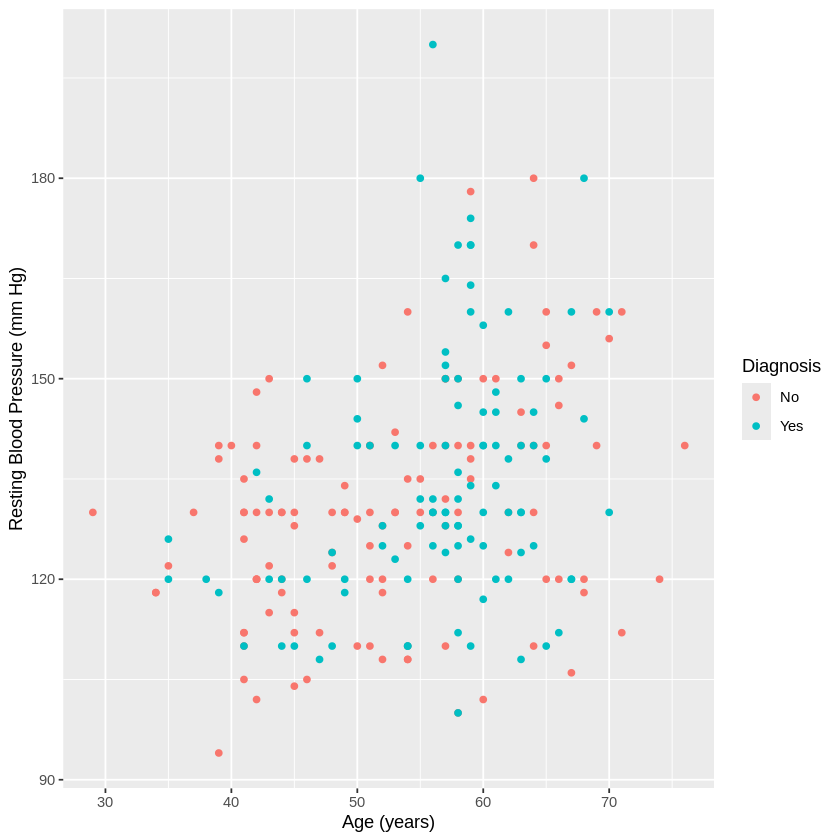

In [7]:
set.seed(1)
plot_1 <- ggplot(cleveland_train, aes(x = age, y = trestbps, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", color = "Diagnosis")       
plot_1
# There's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

Figure 5

Based on the coloured points in the plots, there is a slight positive trend where there is a slightly higher concentration of points with the `Yes` diagnosis to the right of the graph. Similarly, there is a slightly higher concentration of points with the `No` diagnosis to the left of the graph. However, the correlation between `Age` and `Resting Blood Pressure` are still not clear.

Next, we use `ggplot` to compare `Age` and `Serum Cholesterol` to determine their correlation.

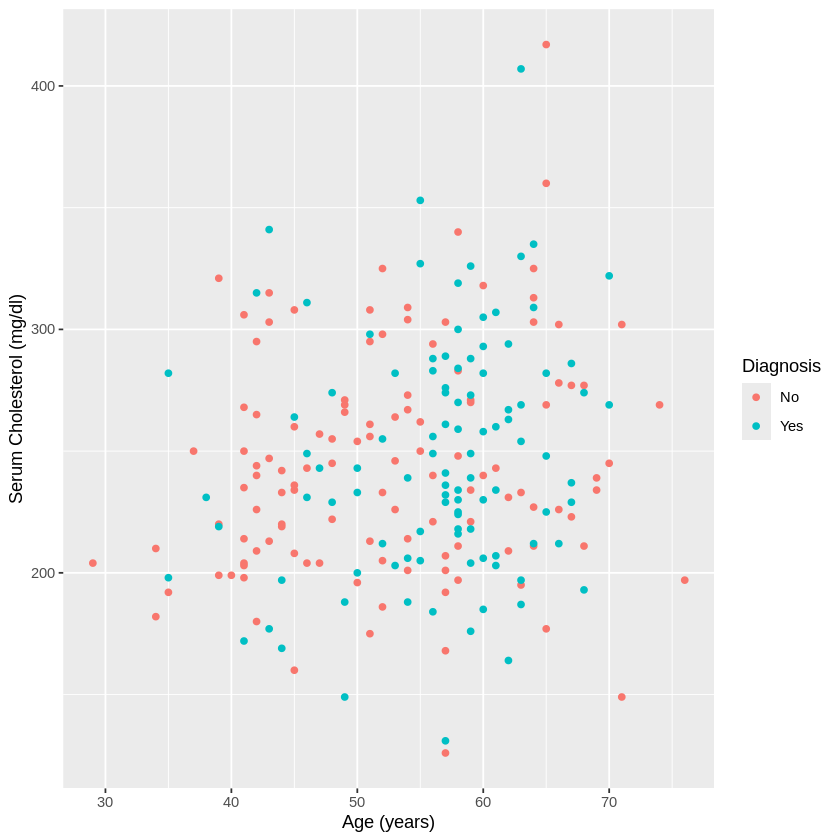

In [8]:
set.seed(1)
plot_2 <- ggplot(cleveland_train, aes(x = age, y = chol, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_2
# Again, there's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

Figure 6

This plot comparing `Age` with `Serum Cholesterol` appears to have the most clear correlation, with more of the same-coloured points clustered together. The majority of the blue points (with the `Yes` diagnosis) are concentrated on the right side of the plot, while the majority of the red points (with the `No` diagnosis) are concentrated on the left side of the plot. While the relationship is still not entirely clear, we thought this plot would be the best to use as our predictors. 

Finally, we use `ggplot` to compare `Resting blood pressure` and `Serum Cholesterol` to determine their correlation.

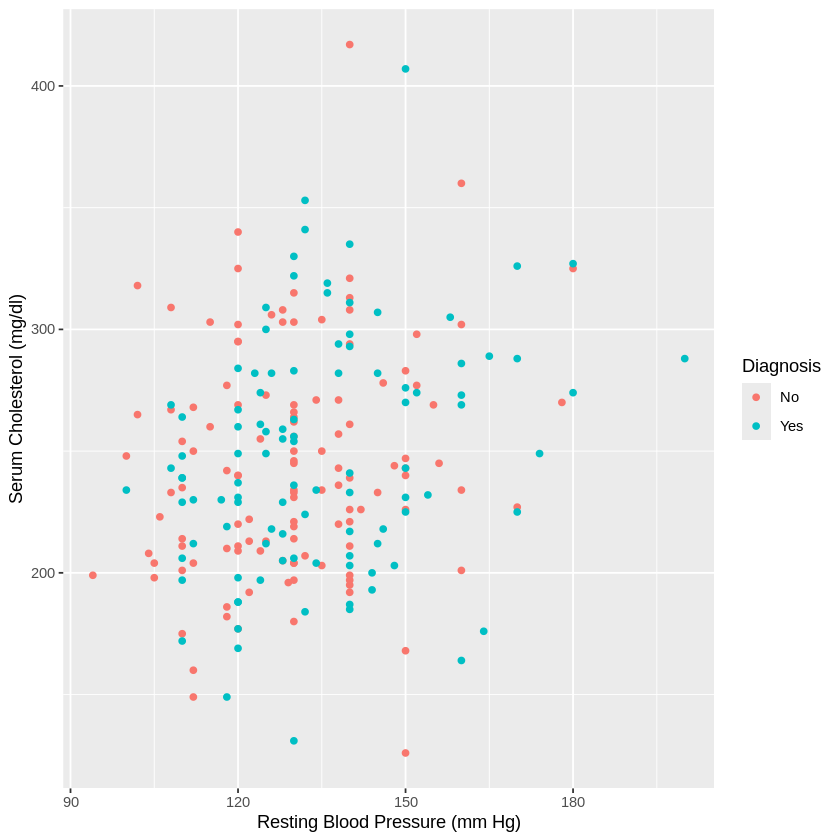

In [9]:
set.seed(1)
plot_3 <- ggplot(cleveland_train, aes(x = trestbps, y = chol, color = num)) +
          geom_point() +
          labs (x = "Resting Blood Pressure (mm Hg)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_3
# Again, there's a slight positive trend in the data, but no clear higher concentration of diagnoses

Figure 7

The correlation between `Resting Blood Pressure` and `Serum Cholesterol` is unclear, as there is a mixture of both red and blue points scattered throughout the plot.

## Initial Model ##

To start, we need to find the value of k using the following steps:
- Set the seed to 1 so that the code runs the same every time
- Create a recipe using age and cholesterol to predict diagnosis
- Create a k nearest neighbours specification, with "tune()" so that the best k can be found
- Create a vfold with v = 10
- Create a workflow with the recipe and specialization
- Test the accuracy of the values of k from 1 to 100

In [10]:
set.seed(1)
cleveland_recipe <- recipe(num ~ age + chol, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

cleveland_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

cleveland_vfold <- vfold_cv(cleveland_train, v = 10, strata = num)

cleveland_wkflw <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(cleveland_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

cleveland_results <- cleveland_wkflw |>
    tune_grid(resamples = cleveland_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))

In [11]:
head(cleveland_results)

neighbors mean     
1 81        0.6326087
2 82        0.6326087
3 87        0.6280632
4 88        0.6280632
5 97        0.6278656
6 98        0.6278656

Figure 8

81 and 82 have the same highest accuracy, so we can graph k vs accuracy in order to decide which value to use:

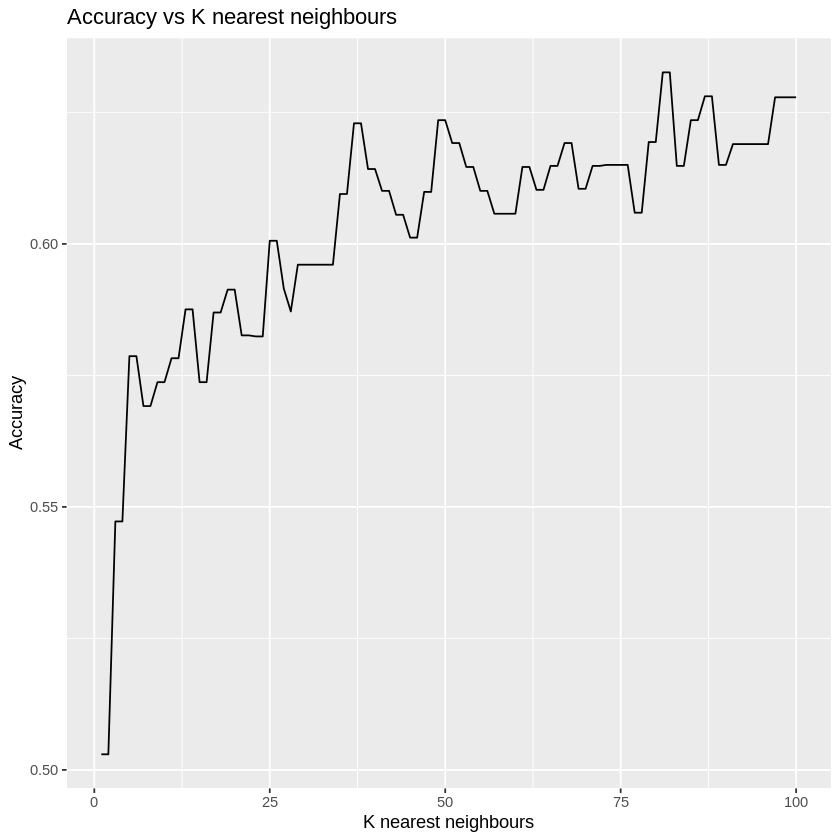

In [12]:
accuracy_plot <- cleveland_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    xlab("K nearest neighbours") +
    ylab("Accuracy") +
    labs(title = "Accuracy vs K nearest neighbours")
accuracy_plot

Figure 9

There is a larger drop from 82 to 83 than from 81 to 80, so we will use 81 as our k value.

## Comparing Model to a Major Classifier ##

Next, we need to compare the accuracy of our model to a major classifier. This can be done with the `cleveland_train` data by
using the `group_by` function to group data points based on the diagnosis and summarizing it to determine the percentages of each class. 

In [13]:
cleveland_accuracy <- cleveland_train |>
    group_by(num) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(cleveland_train))
cleveland_accuracy

num n   percent 
1 No  120 53.81166
2 Yes 103 46.18834

Figure 10

We have determined that the major classifier indicates there is a higher percentage of when "num" equals "No". This suggests  that the majority of patients in this dataset (at 53.81 percent) were not diagnosed with some form of heart disease. Our classifier has determined that the accuracy was 63.26 percent, and therefore higher than the percentage of the major classifier. Based on this comparision, our classifier is more accurate than the major classifier. 

## Building a Final Model ##
Now that we have determined the value of k, we can build our final model. This can be done by creating a spec with `neighbors = 81` and fitting this with the `cleveland_train` data. We must also set the seed to 1 to ensure the code will run the same. 

In [14]:
set.seed(1)

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 81) |>
    set_engine("kknn") |>
    set_mode("classification")

final_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(final_spec) |>
    fit(data = cleveland_train)
final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(81,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3946188
Best kernel: rectangular
Best k: 81

## Checking for overfitting/underfitting

To ensure that the K we calculated generalises our model well to a new data set, we will check for its over/underfitting nature and display a graph.
Having a model that is either over/underfitting is a problem since when this model is applied to a new data set it would not generalise the results
accurately. When fitting a model, we need to strike a balance between the two.

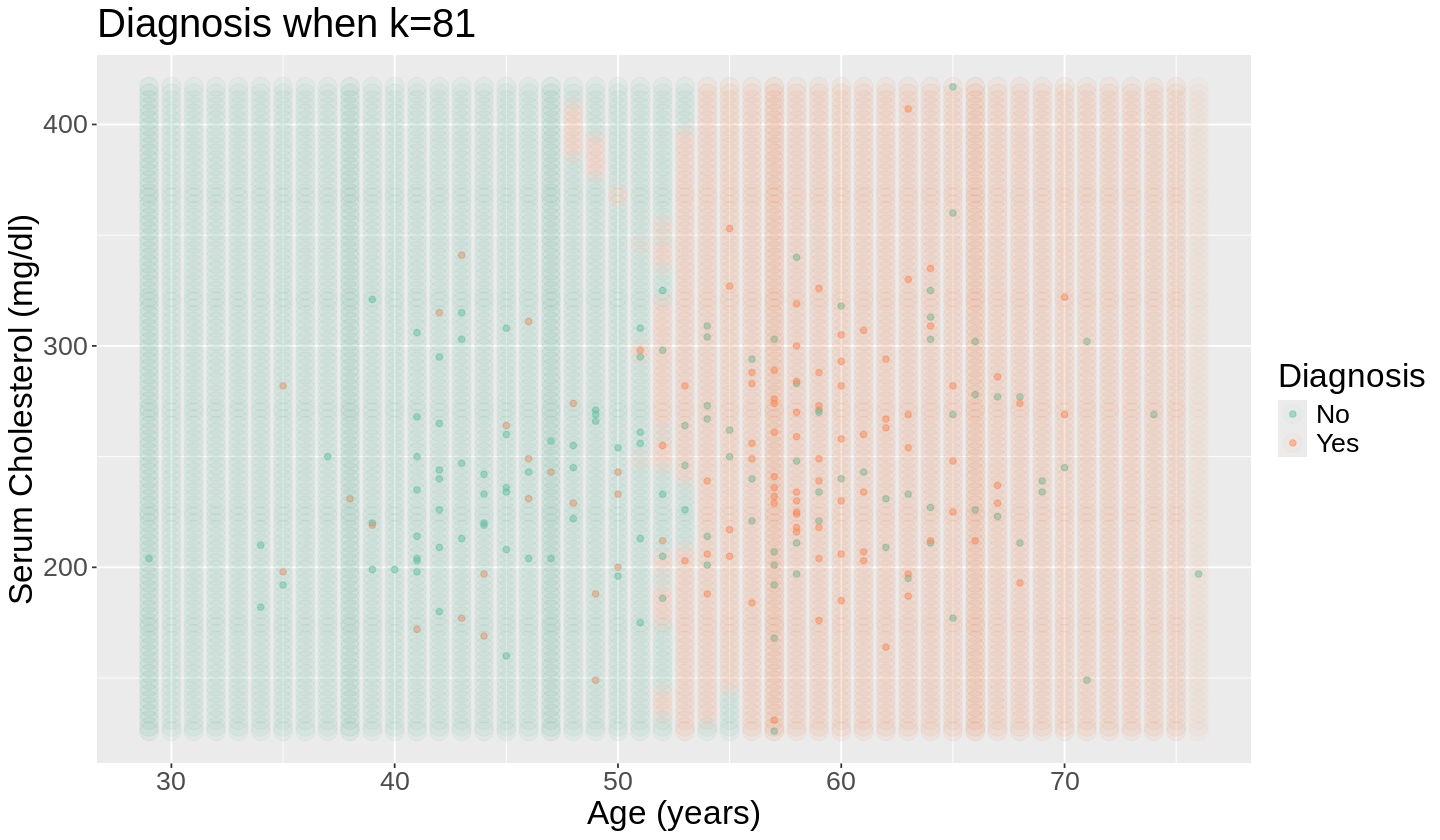

In [15]:
set.seed(1)
options(repr.plot.width=12, repr.plot.height=7)
#Knn model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 81) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#Retraining the classifier
fit <- workflow() %>%
    add_recipe(cleveland_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = cleveland_train)

#graph to check for overfitting/underfitting

age_grid <- seq(from = min(as.integer(cleveland_train$age)), 
                to = max(as.integer(cleveland_train$age)), 
                length.out = 100)

age_grid <- as.integer(age_grid)

chol_grid <- seq(from = min(as.integer(cleveland_train$chol)), 
                 to = max(as.integer(cleveland_train$chol)), 
                 length.out = 100)
chol_grid <- as.integer(chol_grid)

asgrid <- as_tibble(expand.grid(chol = chol_grid,
                                age = age_grid))

knnPredGrid <- predict(fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
                    rename(num = .pred_class)


plot_results <- ggplot() + 
                geom_point(data = cleveland_train, 
                mapping = aes(x = age, y = chol, color = num), 
                alpha = 0.5) +
                geom_point(data = prediction_table, 
                           mapping = aes(x = age, 
                           y = chol, 
                           color = num), 
                           alpha = 0.04, 
                           size = 5) +
                labs(x = "Age (years)", y = "Serum Cholesterol (mg/dl)", 
                     color = "Diagnosis", 
                     title = "Diagnosis when k=81") +
                scale_color_brewer(palette = "Set2") +
                theme(text = element_text(size = 20))

plot_results

Figure 11

As can be seen from our graph, our classifier is neither over nor underfitting and so is reliable when testing out a new data set.

## Testing our Classifier
### Accuracy and Confusion Matrix
Now, it is possible to see the results of the classifier on new data (the testing data set).

In [16]:
set.seed(1)

#Predicting
predictions <- predict(fit, cleveland_test) |>
               bind_cols(cleveland_test)

#Finding the predictions' accuracy
metrics <- predictions |>
           metrics(truth = num, estimate = .pred_class) |>
           filter(.metric == "accuracy")
metrics

#The following confusion matrix will show the classifier's weak points
conf_mat <- predictions |>
            conf_mat(truth = num, estimate = .pred_class)
conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.6315789

          Truth
Prediction No Yes
       No  21   8
       Yes 20  27

Figure 12

Looking at the results, our classifier accurately predicted 48/76 (about 63%) of the diagnoses. However, there are clearly more false diagnoses that predict a heart condition when there isn't one than the opposite, which is favourable to the alternative. It is better to be cautious, and this classifier does so. However, in the real world, this classifier would not replace a licensed medical professional. 

## **Discussion**

### 1. Summary
After noticing that those with high age, cholesterol, and resting blood pressure have a higher chance of having a heart disease, we decided to make a knn classifier to diagnose a patient based on these predictors. Our results show that the classifier can correctly label 63% of the diagnoses, with the majority of the incorrect labels being false positives (which encourages caution, which is favourable.) As such, the correlation between age, cholesterol level, and resting blood p

### 2. Expected Findings and Outcomes
In our project proposal, we initially expected that the risk of heart disease would be influenced by blood pressure, cholesterol levels, presence of angina, resting ECG, and age. We based this hypothesis on various graphs we designed to test if comparing any two variables would produce a positive or negative correlation and how points were coloured based on the patient's diagnosis. We predicted that patients that were diagnosed with heart disease were more likely to have high blood pressure, high cholesterol levels, and be older in age, using these as predictors to determine whether or not a patient would have heart disease. 

Based on the graphs comparing various variables, we determined that age and cholesterol levels had the most clear correlation. We decided to use them as predictors to produce a model to determine if they could predict if patients were diagnosed with heart disease. As mentioned in the summary, our classifier was determined to have an accuracy of 63% in predicting patient diagnoses of heart disease. This means our classifier was able to correctly predict the majority of heart disease diagnoses using these two predictors, which suggests that our expected findings were similar to our actual outcomes. While the accuracy is not extremely high, we expected this might happen, as the correlation between all the variables were not strong. However, our data still agrees with our expected findings. The variables we chose to use as predictors were still able to help determine if the patients were diagnosed with heart disease. It indicates that patients that are older in age, have higher blood pressure, and have higher cholesterol levels are more likely to be diagnosed with heart disease than patients who do not.

### 3. Impact of the Findings
Our data science project developed a classification system for predicting heart disease, enhancing diagnostic processes in healthcare. This system informs doctors' initial assessments based on age and cholesterol levels, potentially leading to earlier and more accurate treatments. It also allows for more efficient use of doctors' time by prioritizing patients likely to have true diagnoses over those with false ones.

Despite the classifier's reasonable accuracy of 63%, it is crucial to use these results as preliminary. However, The presence of false positives can lead to unnecessary treatments and anxiety, underscoring the importance of accurate diagnosis. Therefore, we recommend that our classifier be used as an initial tool, with a healthcare professional confirming its predictions through further evaluation to ensure patient safety and diagnostic accuracy. This approach safeguards against misdiagnosis and maximizes medical system efficiency.

### 4. Future Questions

Creating our predictive model has lead us to consider improvements to our model and further applications of our model. One of the main questions we have is how to improve the accuracy of our model's predictions. While our 63% accuracy means that the majority of diagnoses are correctly predicted by the model, there is ample room for improvement. It's possible that expanding the scope of the training data, or using a more accurate classifier algorithm, could improve the model. Another question that arises is the potential impact of the classifier's high rate of false positives. False positive diagnoses are better than false negatives in that they won't discourage sick patients from getting treatment, but they could still overwhelm the system with more patients than are necessary. A question for the future is how to improve this potential issue.

## References ##

- CDC. (2023). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm
- Dalen, J. E., Alpert, J. S., Goldberg, R. J., Weinstein, R. S. (2014). The Epidemic of the 20th Century: Coronary Heart Disease. The American Journal of Medicine. 127(9), 807-812. DOI: https://doi.org/10.1016/j.amjmed.2014.04.015

- The creators of the Heart Disease Database are:
  
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.